# Lab 2

## Step 1 - Illustration of Non-Linear Data

### Step 1a - Import Libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

### Step 1b - Recreate the Plotting Function

In [2]:
# create a function to display model fitting

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid for model evaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Step 1c - Create Non-Linear Dummy Data

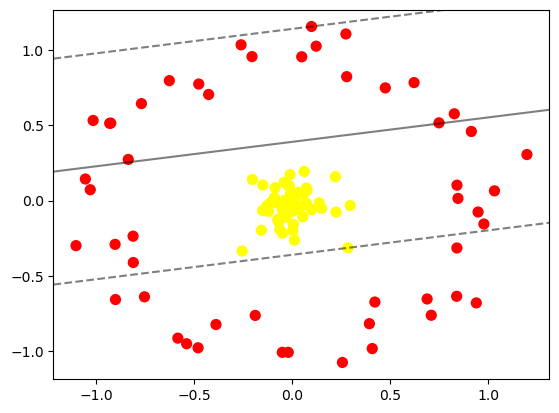

In [3]:
# example of non-linearly separable data
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [4]:
r = np.exp(-(X**2).sum(1))

In [5]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.00215193, -0.01013433],
       [ 0.01295217, -0.01606534],
       [-0.81143092, -0.41215508],
       [ 0.84666623,  0.01463425],
       [ 0.01516836,  0.02427696],
       [-0.01070177,  0.17279966],
       [-0.769967  ,  0.64531299],
       [-0.08683504,  0.08575507],
       [-0.05236442, -0.05070791],
       [-0.47727384,  0.77574824],
       [ 0.22371272, -0.07710791],
       [-0.02251703,  0.10450361],
       [ 0.13834277, -0.01444659],
       [ 0.91483132,  0.46016658],
       [-0.15003528,  0.10355637],
       [ 0.8400577 , -0.636885  ],
       [-0.00829628,  0.05132055],
       [-0.09096818,  0.02012776],
       [-0.38917112, -0.82474779],
       [ 0.00290389, -0.19892713],
       [ 0.09871771,  1.15872024],
       [-0.83722599,  0.27380886],
       [ 0.07125634, -0.01621054],
       [ 0.22098952,  0.15898661],
       [ 0.09850922, -0.06039225],
       [-0.58390421, -0.91542717],
       [-1.03120383,  0.07231955],
       [

## Step 2 - Model Fitting

In [6]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

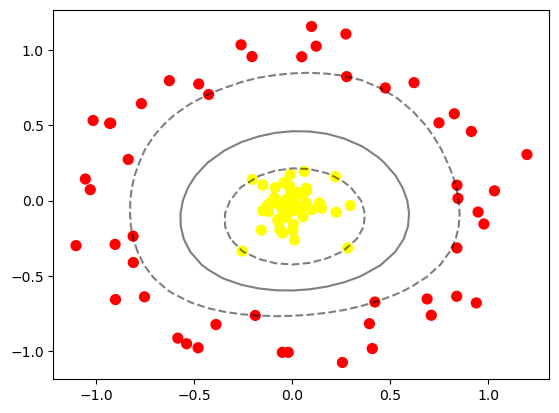

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')